In [1]:
import tensorflow as tf

In [2]:
data = """In the town of Athy one Jeremy Lanigan
Battered away til he hadnt a pound.
His father died and made him a man again
Left him a farm and ten acres of ground.

He gave a grand party for friends and relations
Who didnt forget him when come to the wall,
And if youll but listen Ill make your eyes glisten
Of the rows and the ructions of Lanigan’s Ball.

Myself to be sure got free invitation,
For all the nice girls and boys I might ask,
And just in a minute both friends and relations
Were dancing round merry as bees round a cask.

udy ODaly, that nice little milliner,
She tipped me a wink for to give her a call,
And I soon arrived with Peggy McGilligan
Just in time for Lanigans Ball."""

In [3]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [4]:
corpus = data.lower().split('\n')
print(corpus[:5])

['in the town of athy one jeremy lanigan', 'battered away til he hadnt a pound.', 'his father died and made him a man again', 'left him a farm and ten acres of ground.', '']


In [5]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # index starts from 0

In [33]:
input_sequences = []
splitted = data.split()
for id in range(0,len(splitted)-11, 11):
  line = splitted[id:id+11]
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [9]:
max_sequence_len = max([len(x) for x in input_sequences])
print("Max len:", max_sequence_len)

Max len: 11


In [34]:
import numpy as np

padded_input_sequences = np.array(
    tf.keras.preprocessing.sequence.pad_sequences(
        input_sequences,maxlen=max_sequence_len,padding='pre'
    )
)

print(padded_input_sequences[:5])

[[ 0  0  0  0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  0  0  0  6  3 17]
 [ 0  0  0  0  0  0  0  6  3 17  4]
 [ 0  0  0  0  0  0  6  3 17  4 18]
 [ 0  0  0  0  0  6  3 17  4 18 19]]


In [35]:
xs, labels = padded_input_sequences[:,:-1], padded_input_sequences[:,-1]

In [36]:
# convert to one hot encoding
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [37]:
print(xs[0], ys[0])

[0 0 0 0 0 0 0 0 0 6] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [38]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(total_words, 8),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)),
  tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 8)           776       
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 20)          1520      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 20)                2480      
_________________________________________________________________
dense_3 (Dense)              (None, 97)                2037      
Total params: 6,813
Trainable params: 6,813
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(xs, ys, epochs=1500)

Epoch 1/1500
4/4 [==============================] - 6s 16ms/step - loss: 4.5742 - accuracy: 0.0151
Epoch 2/1500
4/4 [==============================] - 0s 19ms/step - loss: 4.5710 - accuracy: 0.0385
Epoch 3/1500
4/4 [==============================] - 0s 17ms/step - loss: 4.5669 - accuracy: 0.0723
Epoch 4/1500
4/4 [==============================] - 0s 13ms/step - loss: 4.5641 - accuracy: 0.0302
Epoch 5/1500
4/4 [==============================] - 0s 15ms/step - loss: 4.5596 - accuracy: 0.0515
Epoch 6/1500
4/4 [==============================] - 0s 18ms/step - loss: 4.5535 - accuracy: 0.0530
Epoch 7/1500
4/4 [==============================] - 0s 15ms/step - loss: 4.5442 - accuracy: 0.0749
Epoch 8/1500
4/4 [==============================] - 0s 16ms/step - loss: 4.5415 - accuracy: 0.0676
Epoch 9/1500
4/4 [==============================] - 0s 17ms/step - loss: 4.5251 - accuracy: 0.0780
Epoch 10/1500
4/4 [==============================] - 0s 17ms/step - loss: 4.5117 - accuracy: 0.0728
Epoch 11/

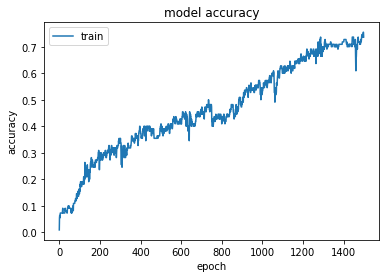

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
seed_text = "in the town of athy"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = tf.keras.preprocessing.sequence.pad_sequences(
    [token_list], maxlen=max_sequence_len, padding='pre'
)

In [21]:
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

[19]


In [23]:
rev_map = { tokenizer.word_index[k]: k for k in tokenizer.word_index } 

In [25]:
rev_map[predicted[0]]

'one'

In [43]:
def predict(seed_text, next_words=35):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences(
        [token_list], maxlen=max_sequence_len, padding='pre'
    )
    predicted = np.argmax(model.predict(token_list), axis=-1)
    seed_text += " " + rev_map[predicted[0]]
  return seed_text
  
print(predict("sweet jeremy saw dublin"))

sweet jeremy saw dublin tipped me a wink for to eyes her a relations away in time didnt i didnt but but i but didnt i who him him him him him him him a lanigan’s for to eyes
